Imorting Libraries

In [1]:
import numpy as np
import pandas as pd
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import json
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

Names of Capiatal Cities from UN database:



In [2]:
url="https://data.un.org/_Docs/SYB/CSV/SYB61_253_Population%20Growth%20Rates%20in%20Urban%20areas%20and%20Capital%20cities.csv"

In [3]:
capitals=pd.read_csv(url, encoding='latin-1', skiprows=1, sep=",")
capitals=capitals.iloc[292:,[1,4]].groupby(['Unnamed: 1'],as_index=False).first()
#capitals=capitals.loc[(capitals['Year']==2018) & (capitals['Series']=='Capital city population (thousands)')].drop(['Year','Series'], axis=1)
capitals.rename(columns={'Unnamed: 1':'Country'}, inplace=True)
#capitals.set_index('Country',inplace=True)


Members of EU:

In [4]:
url='https://europa.eu/european-union/about-eu/countries_en#tab-0-1'
Table=pd.read_html(url)
EU_Count=pd.concat([Table[0].iloc[:,0],Table[0].iloc[:,1]])
EU_Count=pd.DataFrame(EU_Count, columns=['Country'])
#EU_Count.set_index('Countries',inplace=True)
EU_Count=pd.merge(EU_Count,capitals,on='Country')
#EU_Count['Population']= EU_Count['Population'].str.replace(',', '')
#EU_Count['Population']= EU_Count['Population'].astype('int')


Adjectives of Nationalities:

In [5]:
url='https://www.vocabulary.cl/Basic/Nationalities.htm'
Table=pd.read_html(url)
Table=Table[1].iloc[:,:2]
Table
EU_Count=pd.merge(EU_Count,Table,on='Country', how='left')


In [6]:
EU_Count


,Country,Capital City,Nationality (Adjective)
0,Austria,Vienna,Austrian
1,Belgium,Brussels,Belgian
2,Bulgaria,Sofia,Bulgarian
3,Croatia,Zagreb,Croatian
4,Cyprus,Nicosia,NaN
5,Czechia,Prague,NaN
6,Denmark,Copenhagen,Danish
7,Estonia,Tallinn,Estonian
8,Finland,Helsinki,Finnish
9,France,Paris,French


Filling manualy missing data:

In [7]:
EU_Count.iloc[4,[2]]='Cypriot'
EU_Count.iloc[5,[2]]='Czech'
EU_Count.iloc[17,[2]]='Luxembourgish'
EU_Count.iloc[24,[2]]='Slovenian'


EU_Count

,Country,Capital City,Nationality (Adjective)
0,Austria,Vienna,Austrian
1,Belgium,Brussels,Belgian
2,Bulgaria,Sofia,Bulgarian
3,Croatia,Zagreb,Croatian
4,Cyprus,Nicosia,Cypriot
5,Czechia,Prague,Czech
6,Denmark,Copenhagen,Danish
7,Estonia,Tallinn,Estonian
8,Finland,Helsinki,Finnish
9,France,Paris,French


Getting coordinates of Capital Cities:

In [8]:
EU_Count['Latitude']=""
EU_Count['Longitude']=""

for i in EU_Count['Capital City']:
    address = i
    geolocator = Nominatim(user_agent="eu_explorer",timeout=3)
    location = geolocator.geocode(address)
    EU_Count.loc[EU_Count['Capital City']==i,'Latitude'] = location.latitude
    EU_Count.loc[EU_Count['Capital City']==i,'Longitude'] = location.longitude


In [9]:
EU_Count.rename(columns={'Nationality  (Adjective)':'Nationality'}, inplace=True)
EU_Count.columns
EU_Cap=EU_Count.copy()

Forsquare  / Please enter Your credentails here:

In [93]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20200119'
LIMIT = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


Getting all categories from Foursquare database:

In [11]:
urlcat='https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(CLIENT_ID, CLIENT_SECRET,VERSION)
categories= requests.get(urlcat).json()
categories


{'meta': {'code': 200, 'requestId': '5e4ed6f529ce6a001ca5b529'},
 'response': {'categories': [{'id': '4d4b7104d754a06370d81259',
    'name': 'Arts & Entertainment',
    'pluralName': 'Arts & Entertainment',
    'shortName': 'Arts & Entertainment',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'categories': [{'id': '56aa371be4b08b9a8d5734db',
      'name': 'Amphitheater',
      'pluralName': 'Amphitheaters',
      'shortName': 'Amphitheater',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4fceea171983d5d06c3e9823',
      'name': 'Aquarium',
      'pluralName': 'Aquariums',
      'shortName': 'Aquarium',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4bf58dd8d48988d1e1931735',
      'name': 'A

Seeking for national restaurants

In [12]:
categories_2=categories['response']['categories'][3]['categories']
#categories_2['categories']
cat_df = json_normalize(categories_2)
EU_Count['Category']=""
EU_Count['Cat_Id']=""

for i in EU_Count['Nationality']:
    EU_Count.loc[EU_Count['Nationality']==i,'Category']=i+' Restaurant'
    

In [13]:
cat_df.loc[:,['name','id']]

,name,id
0,Afghan Restaurant,503288ae91d4c4b30a586d67
1,African Restaurant,4bf58dd8d48988d1c8941735
2,American Restaurant,4bf58dd8d48988d14e941735
3,Asian Restaurant,4bf58dd8d48988d142941735
4,Australian Restaurant,4bf58dd8d48988d169941735
...,...,...
87,Truck Stop,57558b36e4b065ecebd306dd
88,Turkish Restaurant,4f04af1f2fb6e1c99f3db0bb
89,Ukrainian Restaurant,52e928d0bcbc57f1066b7e96
90,Vegetarian / Vegan Restaurant,4bf58dd8d48988d1d3941735


Combining the base table together:

In [14]:
EU_Count=pd.merge(EU_Count,cat_df.loc[:,['name','id']],left_on='Category',right_on='name')
EU_Count['Cat_Id']=EU_Count['id']
EU_Count.drop(['name','id'], axis=1, inplace=True)
EU_Count

,Country,Capital City,Nationality,Latitude,Longitude,Category,Cat_Id
0,Austria,Vienna,Austrian,48.2084,16.3725,Austrian Restaurant,52e81612bcbc57f1066b7a01
1,Belgium,Brussels,Belgian,50.8437,4.36744,Belgian Restaurant,52e81612bcbc57f1066b7a02
2,Czechia,Prague,Czech,50.0875,14.4213,Czech Restaurant,52f2ae52bcbc57f1066b8b81
3,France,Paris,French,48.8567,2.35146,French Restaurant,4bf58dd8d48988d10c941735
4,Germany,Berlin,German,52.517,13.3889,German Restaurant,4bf58dd8d48988d10d941735
5,Greece,Athens,Greek,37.9841,23.728,Greek Restaurant,4bf58dd8d48988d10e941735
6,Hungary,Budapest,Hungarian,47.4814,19.1461,Hungarian Restaurant,52e81612bcbc57f1066b79fa
7,Italy,Rome,Italian,41.8933,12.4829,Italian Restaurant,4bf58dd8d48988d110941735
8,Netherlands,Amsterdam,Dutch,52.3728,4.8936,Dutch Restaurant,5744ccdfe4b0c0459246b4d0
9,Poland,Warsaw,Polish,52.2337,21.0714,Polish Restaurant,52e81612bcbc57f1066b7a04


Getting Amount of restaurants in capitals (Note - it takes up to 5 minutes to get the values! You can skip this section and load the result table below from csv file):

In [15]:
for nationality in EU_Count['Nationality']:
    #EU_Cap.drop([nationality], axis =1, inplace = True)
    EU_Cap[nationality]=""


In [16]:
for country, nationality,lat ,long in zip(EU_Cap['Country'], EU_Cap['Nationality'],EU_Cap['Latitude'],EU_Cap['Longitude'] ):
    for cuisine,cuisine_id, nationality_cuisine in zip(EU_Count['Category'],EU_Count['Cat_Id'],EU_Count['Nationality']):
        if nationality != nationality_cuisine:
            ven_tot=0
            offset=0
            ven_se=100
            while ven_se==100:
                ven_se=0
                category=cuisine_id
                latitude=lat
                longitude=long
                radius = 20000
                url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&offset={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION,category, offset,radius, LIMIT)
                results = requests.get(url).json()
                venues = results['response']['groups'][0]['items']     
                venues_data = json_normalize(venues) # flatten JSON
                ven_se=len(venues_data)
                ven_tot=ven_tot+ven_se
                offset=offset+100
            EU_Cap.loc[EU_Cap['Country']==country, nationality_cuisine]=ven_tot
        else:
            EU_Cap.loc[EU_Cap['Country']==country, nationality_cuisine]=0
EU_Cap


,Country,Capital City,Nationality,Latitude,Longitude,Austrian,Belgian,Czech,French,German,Greek,Hungarian,Italian,Dutch,Polish,Portuguese,Slovak,Spanish
0,Austria,Vienna,Austrian,48.2084,16.3725,0,5,15,57,65,63,10,195,1,4,4,1,29
1,Belgium,Brussels,Belgian,50.8437,4.36744,3,0,1,269,5,130,4,232,40,6,32,1,89
2,Bulgaria,Sofia,Bulgarian,42.6979,23.3222,3,8,12,58,17,48,1,112,2,0,0,0,19
3,Croatia,Zagreb,Croatian,45.8132,15.977,3,3,1,17,4,4,1,40,0,0,0,0,7
4,Cyprus,Nicosia,Cypriot,35.1739,33.3647,1,4,0,15,5,114,1,52,0,1,1,0,5
5,Czechia,Prague,Czech,50.0875,14.4213,9,21,0,131,24,34,5,176,2,4,1,0,32
6,Denmark,Copenhagen,Danish,55.6867,12.5701,4,17,6,125,7,16,2,134,0,5,1,0,35
7,Estonia,Tallinn,Estonian,59.4372,24.7454,1,7,1,26,12,8,0,52,2,1,2,0,5
8,Finland,Helsinki,Finnish,60.1674,24.9426,1,13,2,39,14,15,3,114,0,0,1,0,23
9,France,Paris,French,48.8567,2.35146,0,42,2,0,29,83,4,268,8,4,45,0,156


In [17]:
#EU_Cap.to_csv(r'EU_cap.csv')

To load the result table from csv file uncomment the cell below:

In [20]:
#EU_Cap=pd.read_csv(r'EU_cap.csv')
#EU_Cap.drop(['Unnamed: 0'],1,inplace=True)

## Clustering

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
EU_Cap_Cl=EU_Cap.iloc[:,5:].astype(int)
EU_Cap_Cl



,Austrian,Belgian,Czech,French,German,Greek,Hungarian,Italian,Dutch,Polish,Portuguese,Slovak,Spanish
0,0,5,15,57,65,63,10,195,1,4,4,1,29
1,3,0,1,269,5,130,4,232,40,6,32,1,89
2,3,8,12,58,17,48,1,112,2,0,0,0,19
3,3,3,1,17,4,4,1,40,0,0,0,0,7
4,1,4,0,15,5,114,1,52,0,1,1,0,5
5,9,21,0,131,24,34,5,176,2,4,1,0,32
6,4,17,6,125,7,16,2,134,0,5,1,0,35
7,1,7,1,26,12,8,0,52,2,1,2,0,5
8,1,13,2,39,14,15,3,114,0,0,1,0,23
9,0,42,2,0,29,83,4,268,8,4,45,0,156


Heatmap preparation

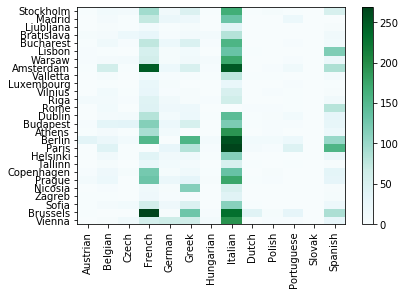

<Figure size 1440x1280 with 0 Axes>

In [69]:
fig, ax = plt.subplots()
im = ax.pcolor(EU_Cap_Cl, cmap='BuGn')

#label names
col_labels = EU_Cap['Capital City']
row_labels =  EU_Cap_Cl.columns
#move ticks and labels to the center
ax.set_xticks(np.arange(EU_Cap_Cl.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(EU_Cap_Cl.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

fig.colorbar(im)
plt.show()

In [20]:

EU_Cap_Clt=EU_Cap_Cl.transpose()


In [21]:
clusters=7
kmeans = KMeans(n_clusters=clusters, random_state=0).fit(EU_Cap_Clt)
kmeans.labels_

array([1, 5, 1, 3, 6, 4, 1, 2, 1, 1, 1, 1, 0], dtype=int32)

In [22]:
EU_Cap_Clt['Cluster']=kmeans.labels_
#EU_Cap.insert(0, 'Cluster', kmeans.labels_)
#EU_Cap['Cluster']=kmeans.labels_


In [23]:
EU_Cap_Clt['Total']=np.sum(EU_Cap_Clt.iloc[:,0:27].astype('int32'),axis=1)


In [24]:
EU_Cap_Clt.sort_values(['Total'],ascending=False, inplace=True)
EU_Cap_Clt

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,Cluster,Total
Italian,195,232,112,40,52,176,134,52,114,268,...,252,174,133,157,82,39,132,168,2,3441
French,57,269,58,17,15,131,125,26,39,0,...,249,58,54,75,29,12,73,95,3,1979
Spanish,29,89,19,7,5,32,35,5,23,156,...,88,24,118,11,13,5,0,53,0,1007
Greek,63,130,48,4,114,34,16,8,15,83,...,51,13,11,49,10,6,19,48,4,986
German,65,5,17,4,5,24,7,12,14,29,...,20,6,6,20,4,3,24,14,6,365
Belgian,5,0,8,3,4,21,17,7,13,42,...,59,8,3,15,8,5,8,12,5,352
Portuguese,4,32,0,0,1,1,1,2,1,45,...,15,4,0,4,1,0,20,2,1,182
Czech,15,1,12,1,0,0,6,1,2,2,...,3,9,1,4,21,3,2,9,1,161
Austrian,0,3,3,3,1,9,4,1,1,0,...,3,4,4,3,7,0,1,3,1,104
Dutch,1,40,2,0,0,2,0,2,0,8,...,0,0,2,1,0,0,1,2,1,84


In [25]:
EU_Grouped=EU_Cap_Clt.groupby(['Cluster']).sum(axis=1)

EU_Grouped.index=['Spanish','International','Italian','French','Greek','Belgian','German']

In [26]:
EU_Grouped.sort_values(['Total'], ascending=False, inplace=True)

In [94]:

#EU_Map=EU_Grouped[['Total']].copy()
EU_Map=EU_Cap_Clt[['Total']].copy()
#tu dalej, doda rank dla clusterow, pozostale (6ty) z jednym rankiem.
#zrobic mape wg. ranku zamiast Total
EU_Map['Nat']=EU_Map.index
EU_Map=pd.merge(EU_Map, EU_Cap.iloc[:,[0,1,2,3,4]], left_on='Nat', right_on='Nationality')
#EU_Map=EU_Map.drop(index='International')
#EU_Map



Results after clustering:

In [28]:

EU_Cap_New=pd.merge(EU_Cap.iloc[:,0:5],EU_Grouped.iloc[:,0:27].transpose(), left_index=True, right_index=True)
EU_Cap_New



,Country,Capital City,Nationality,Latitude,Longitude,Italian,French,Spanish,Greek,International,German,Belgian
0,Austria,Vienna,Austrian,48.2084,16.3725,195,57,29,63,35,65,5
1,Belgium,Brussels,Belgian,50.8437,4.36744,232,269,89,130,87,5,0
2,Bulgaria,Sofia,Bulgarian,42.6979,23.3222,112,58,19,48,18,17,8
3,Croatia,Zagreb,Croatian,45.8132,15.977,40,17,7,4,5,4,3
4,Cyprus,Nicosia,Cypriot,35.1739,33.3647,52,15,5,114,4,5,4
5,Czechia,Prague,Czech,50.0875,14.4213,176,131,32,34,21,24,21
6,Denmark,Copenhagen,Danish,55.6867,12.5701,134,125,35,16,18,7,17
7,Estonia,Tallinn,Estonian,59.4372,24.7454,52,26,5,8,7,12,7
8,Finland,Helsinki,Finnish,60.1674,24.9426,114,39,23,15,7,14,13
9,France,Paris,French,48.8567,2.35146,268,0,156,83,63,29,42


Getting Population and touristic traffic data from Eurostat:

In [29]:
!wget https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/urb_cpopcb.tsv.gz
!wget https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/urb_ctour.tsv.gz

--2020-02-20 20:14:46--  https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/urb_cpopcb.tsv.gz
Resolving ec.europa.eu (ec.europa.eu)... 2a01:7080:24:100::666:30, 2a01:7080:14:100::666:30, 147.67.34.30, ...
Connecting to ec.europa.eu (ec.europa.eu)|2a01:7080:24:100::666:30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 311280 (304K) [application/octet-stream]
Saving to: ‘BulkDownloadListing?file=data%2Furb_cpopcb.tsv.gz.1’

BulkDownloadListing 100%[===================>] 303,98K   354KB/s    in 0,9s    

2020-02-20 20:14:47 (354 KB/s) - ‘BulkDownloadListing?file=data%2Furb_cpopcb.tsv.gz.1’ saved [311280/311280]

--2020-02-20 20:14:48--  https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/urb_ctour.tsv.gz
Resolving ec.europa.eu (ec.europa.eu)... 2a01:7080:14:100::666:30, 2a01:7080:24:100::666:30, 147.67.210.30, ...
Connecting to ec.europa.eu (ec.europa.eu)|2a01:7080:14:100::666:30|:443... fail

In [30]:
import gzip
with gzip.open('BulkDownloadListing?file=data%2Furb_cpopcb.tsv.gz') as f:

   population = pd.read_csv(f, sep='\t')



In [31]:
with gzip.open('BulkDownloadListing?file=data%2Furb_ctour.tsv.gz') as f:

   tourism = pd.read_csv(f, sep='\t')

In [32]:
!wget  https://ec.europa.eu/eurostat/cache/metadata/Annexes/urb_esms_an4.xls
   

--2020-02-20 20:17:17--  https://ec.europa.eu/eurostat/cache/metadata/Annexes/urb_esms_an4.xls
Resolving ec.europa.eu (ec.europa.eu)... failed: Temporary failure in name resolution.
wget: unable to resolve host address ‘ec.europa.eu’


In [33]:
Cities=pd.read_excel('urb_esms_an4.xls')


Filtering

In [34]:
filter_cities=population.iloc[:,0].str.split(',',n=1, expand=True)
filter_cities2=tourism.iloc[:,0].str.split(',',n=1, expand=True)

In [35]:
population['CityCODE']=filter_cities[1]
population['filter']=filter_cities[0]

tourism['CityCODE']=filter_cities2[1]
tourism['filter']=filter_cities2[0]

In [36]:
population=pd.merge(population,Cities, left_on='CityCODE', right_on='CODE')
tourism=pd.merge(tourism,Cities, left_on='CityCODE', right_on='CODE')

In [37]:
#filter  	DE2002V for EU Foreigners
population_EUF=population[population['filter']=='DE2002V']
#filter  	CR2001V for Total nights spent in tourist accommodation establishments 
tourism=tourism[tourism['filter']=='CR2001V']

Getting country codes:

In [39]:
codes=pd.read_csv('https://www.eea.europa.eu/data-and-maps/data/waterbase-lakes-4/country-codes-and-abbreviations-32-records/country-codes-and-abbreviations-32-records/at_download/file')

In [40]:
codes
codes2 = pd.DataFrame([['CZ', 'Czech'], [7, 8]], columns=['ISO2','Country Name'])

In [41]:
population_EUF['ISO']=population_EUF['CODE'].str[0:2]
population_EUF=pd.merge(population_EUF,codes, left_on='ISO', right_on='ISO2')
tourism['ISO']=tourism['CODE'].str[0:2]
tourism=pd.merge(tourism,codes, left_on='ISO', right_on='ISO2')

/home/bartek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
popEUF=population_EUF[population_EUF['CODE'].str[2:6]=='001C']

tourism=tourism[tourism['CODE'].str[2:6]=='001C']

Preparation of base table for ANOVA anlasis:

In [43]:
EU_Cap_New['Population']=""
EU_Cap_New['Tourism']=""
EU_Cap_New['YearP']=""
EU_Cap_New['YearT']=""

for country in EU_Cap_New['Country']:
    for i in range(1,20): 
            try:
                if ':' not in popEUF.loc[popEUF['Country name']==country, popEUF.columns[i]].iloc[0]:
                    EU_Cap_New.loc[EU_Cap_New['Country']==country,'Population']=popEUF.loc[popEUF['Country name']==country, popEUF.columns[i]].iloc[0]
                    EU_Cap_New.loc[EU_Cap_New['Country']==country,'YearP']=popEUF.columns[i]
                    break
            except:
                continue
    for i in range(1,20): 
            try:
                if ':' not in tourism.loc[tourism['Country name']==country, tourism.columns[i]].iloc[0]:
                    EU_Cap_New.loc[EU_Cap_New['Country']==country,'Tourism']=tourism.loc[tourism['Country name']==country, tourism.columns[i]].iloc[0]
                    EU_Cap_New.loc[EU_Cap_New['Country']==country,'YearT']=tourism.columns[i]
                    break
            except:
                continue

In [44]:

import re
def numb(text):
    return re.sub("[^0-9]", "",text)

EU_Cap_New['Population']=EU_Cap_New['Population'].apply(numb)
EU_Cap_New['Tourism']=EU_Cap_New['Tourism'].apply(numb)
EU_Cap_New

,Country,Capital City,Nationality,Latitude,Longitude,Italian,French,Spanish,Greek,International,German,Belgian,Population,Tourism,YearP,YearT
0,Austria,Vienna,Austrian,48.2084,16.3725,195,57,29,63,35,65,5,180934,13440328,2014,2014
1,Belgium,Brussels,Belgian,50.8437,4.36744,232,269,89,130,87,5,0,274859,6993061,2018,2018
2,Bulgaria,Sofia,Bulgarian,42.6979,23.3222,112,58,19,48,18,17,8,3305,1925881,2018,2018
3,Croatia,Zagreb,Croatian,45.8132,15.977,40,17,7,4,5,4,3,1279,2511817,2018,2018
4,Cyprus,Nicosia,Cypriot,35.1739,33.3647,52,15,5,114,4,5,4,26799,189354,2011,2002
5,Czechia,Prague,Czech,50.0875,14.4213,176,131,32,34,21,24,21,,,,
6,Denmark,Copenhagen,Danish,55.6867,12.5701,134,125,35,16,18,7,17,30881,5622180,2012,2012
7,Estonia,Tallinn,Estonian,59.4372,24.7454,52,26,5,8,7,12,7,10264,3149626,2018,2018
8,Finland,Helsinki,Finnish,60.1674,24.9426,114,39,23,15,7,14,13,23672,4167982,2018,2018
9,France,Paris,French,48.8567,2.35146,268,0,156,83,63,29,42,397793,67346921,2016,2018


In [45]:
EU_Cap_New.drop(index=[5,11,17,18,19,23],inplace=True)

In [46]:
EU_Cap_New['Total']=EU_Cap_New.loc[:,'Italian':'Belgian'].sum(axis=1)

In [47]:
EU_Cap_ML=EU_Cap_New.drop(EU_Cap_New.loc[:,'Italian':'Belgian'],axis =1)
EU_Cap_ML=EU_Cap_ML.drop(EU_Cap_ML.loc[:,'YearP':'YearT'],axis =1)

Base table for ANOVA:

In [87]:
EU_Cap_ML.to_csv(r'EU_Cap_ML')
EU_Cap_ML

,Country,Capital City,Nationality,Latitude,Longitude,Population,Tourism,Total
0,Austria,Vienna,Austrian,48.2084,16.3725,180934,13440328,449
1,Belgium,Brussels,Belgian,50.8437,4.36744,274859,6993061,812
2,Bulgaria,Sofia,Bulgarian,42.6979,23.3222,3305,1925881,280
3,Croatia,Zagreb,Croatian,45.8132,15.977,1279,2511817,80
4,Cyprus,Nicosia,Cypriot,35.1739,33.3647,26799,189354,199
6,Denmark,Copenhagen,Danish,55.6867,12.5701,30881,5622180,352
7,Estonia,Tallinn,Estonian,59.4372,24.7454,10264,3149626,117
8,Finland,Helsinki,Finnish,60.1674,24.9426,23672,4167982,225
9,France,Paris,French,48.8567,2.35146,397793,67346921,641
10,Germany,Berlin,German,52.517,13.3889,217300,31150090,792


In [49]:
EU_Cap_ML[['Population','Tourism','Total']]=EU_Cap_ML[['Population','Tourism','Total']].astype('int')

ANOVA Analysis:


In [50]:
from scipy import stats

In [51]:
# ANOVA
f_val, p_val = stats.f_oneway(EU_Cap_ML['Population'],EU_Cap_ML['Tourism'],EU_Cap_ML['Total'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 11.550984042206192 , P = 5.704245855140191e-05


In [52]:
EU_Cap_ML[['Population','Tourism','Total']].corr()

,Population,Tourism,Total
Population,1.000000,0.829938,0.772186
Tourism,0.829938,1.000000,0.523043
Total,0.772186,0.523043,1.000000


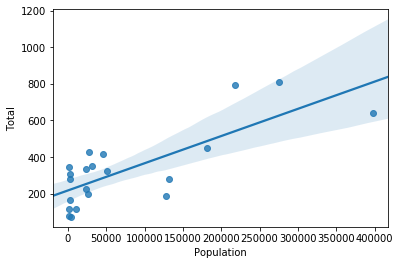

In [89]:
sns.regplot(x="Population", y="Total", data=EU_Cap_ML)

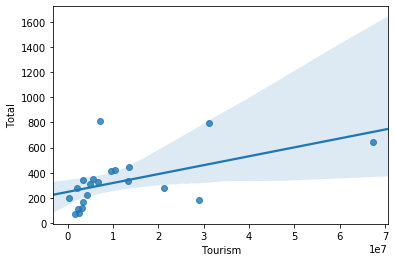

In [90]:
sns.regplot(x="Tourism", y="Total", data=EU_Cap_ML)

## Visualisation

In [82]:
from branca.colormap import LinearColormap


map_data = EU_Map[['Country','Total']]

map_dict = map_data.set_index('Country')['Total'].to_dict()

color_scale = LinearColormap(['white','green'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['NAME_ENGL'])
    if value is None:
        return '#8c8c8c' # MISSING -> gray
    else:
        return color_scale(value)
EU_map = folium.Map(location=[51, 11], zoom_start=4)
#, tiles='Mapbox Bright'


In [ ]:
map_dict

In [55]:
EU_geo=r'CNTR_RG_20M_2016_4326.geojson'

In [95]:
folium.Choropleth(
    geo_data=EU_geo,
    data=EU_Map,
    columns=['Country', 'Total'],
    key_on='feature.properties.NAME_ENGL',
    fill_color='YlGn', 
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Popularity mesured in the Amount of Restaurants in all 27 EU Countries',
    legend_loc='upper left'
    
).add_to(EU_map)


In [86]:
capitals_m = folium.map.FeatureGroup()


for lat, lng in zip(EU_Count.Latitude, EU_Count.Longitude):
    capitals_m.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=2, # define how big you want the circle markers to be
            color='black',
            fill=True,
            fill_color='black',
            fill_opacity=0.6,
            #popup=ctr
        )
    )

# add incidents to map
EU_map.add_child(capitals_m)

EU_map